### computer_vision_project.ipynb

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
!pip install tensorflow_datasets

You should consider upgrading via the 'c:\20210626\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow_datasets as tfds

In [7]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_mujoco_ant',
 'd4rl_mujoco_halfcheetah',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiab

## TensorFlow Datasets
### 사전에 만들어 놓은 머신러닝 데이터셋을 모아둔 것

* 텐서로 이미 데이터를 준비
* 잘 준비된 데이터 정리된 데이터로 실습을 할 수 있다
* 여러가지 데이터 불러오는 방법을 실습할 수 있다.
* 텐서플로 버전이 바뀌면서 새롭게 생기거나 변경된 경우에 빠르게 이 데이터셋으로 테스트를 할 수 있다. 

In [10]:
dataset_list = tfds.list_builders()
print("cifar10" in dataset_list)

True


In [12]:
(train_data, test_data), dataset_info = tfds.load(
    name="cifar10", # 우리가 사용할 데이터셋 지정
    split=["train", "test"],  # 데이터셋 나누는 부분
    shuffle_files=True,  # 파일들을 섞어 줄것인지 default = False
    as_supervised=True, # tuple 형태 (data, label) 로 데이터를 다운로드 할 것인지 여부 / False면 dictionary 형태
    with_info=True, # 데이터셋의 메타 정보도 다운로드 (라벨, 샘플의 갯수 등등)
    download=False)

### Windows의 경우 C:\Users\[자신의 아이디]\tensorflow_datasets 에 다운로드 한 후 압축 해제

In [6]:
dataset_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [13]:
class_names = dataset_info.features["label"].names
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
train_one_sample = train_data.take(1) # (image_tensor, label) 왜? as_supervised=True 로 설정을 했기 때문에

In [15]:
train_one_sample

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

In [17]:
type(train_one_sample)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [34]:
for image, label in train_one_sample:
    print(f"Image shape : {image.shape}")
    print(f"Image dtype : {image.dtype}")
    print(f"Target class : {label}")
    print(f"Class name : {class_name[label.numpy()]}")

Image shape : (32, 32, 3)
Image dtype : <dtype: 'uint8'>
Target class : 7
Class name : horse


In [26]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[203, 214, 234],
        [191, 207, 226],
        [178, 200, 224],
        ...,
        [127, 172, 213],
        [126, 171, 212],
        [124, 170, 211]],

       [[205, 214, 230],
        [186, 199, 213],
        [180, 197, 214],
        ...,
        [132, 178, 219],
        [130, 176, 219],
        [129, 175, 217]],

       [[193, 200, 213],
        [141, 151, 159],
        [124, 137, 145],
        ...,
        [136, 178, 218],
        [134, 177, 218],
        [132, 176, 217]],

       ...,

       [[ 40,  47,  56],
        [ 33,  37,  42],
        [ 31,  35,  41],
        ...,
        [ 73,  99, 132],
        [ 64,  91, 126],
        [ 69,  97, 133]],

       [[ 37,  44,  53],
        [ 31,  34,  40],
        [ 30,  34,  40],
        ...,
        [ 72,  98, 132],
        [ 64,  92, 127],
        [ 68,  96, 132]],

       [[ 34,  41,  50],
        [ 29,  32,  38],
        [ 28,  32,  38],
        ...,
        [ 68,  94, 127]

In [27]:
type(image)

tensorflow.python.framework.ops.EagerTensor

In [28]:
image.ndim

3

In [30]:
import tensorflow as tf

In [31]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=5>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=249>)

(-0.5, 31.5, 31.5, -0.5)

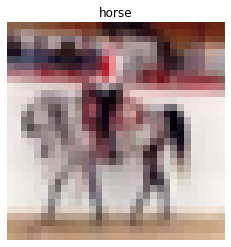

In [35]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis(False)

In [36]:
def preprocess_img(image, label, img_shape = 224):
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32)

In [37]:
preprocessed_img = preprocess_img(image, label)[0]

In [38]:
print(f"{image[:2]}")
print(f"{preprocessed_img[:2]}")

[[[143  96  70]
  [141  96  72]
  [135  93  72]
  [136  96  78]
  [131  86  63]
  [127  74  44]
  [131  75  46]
  [124  65  38]
  [117  54  29]
  [121  55  30]
  [113  45  20]
  [112  46  21]
  [116  50  29]
  [ 88  31  23]
  [ 42  12  16]
  [ 30  14  20]
  [ 34  20  23]
  [ 26  16  19]
  [ 18   9  14]
  [ 21   7  16]
  [ 42  15  24]
  [ 83  28  26]
  [ 96  32  21]
  [100  35  19]
  [ 99  30  13]
  [104  31  18]
  [105  31  16]
  [ 97  28  20]
  [ 86  23  20]
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  [163 140 133]
  [155 124 110]
  [155 114  93]
  [156 115  95]
  [146 104  86]
  [145 103  86]
  [147 102  87]
  [141  87  72]
  [120  63  46]
  [121  71  53]
  [101  64  52]
  [ 67  43  39]
  [ 42  21  22]
  [ 65  43  44]
  [ 74  57  57]
  [ 60  45  46]
  [ 42  23  29]
  [ 43  16  23]
  [ 55  16  17]
  [ 76  30  22]
  [103  47  30]
  [111  45  22]
  [118  45  24]
  [114  45  23]
  [102  37  25]
  [ 93  29  21]
  [108  45  26]
  [112

In [39]:
print(f"{image.shape}")
print(f"{preprocessed_img.shape}")

(32, 32, 3)
(224, 3)
